In [2]:
import numpy as np
import math as m
import os
import matplotlib.pyplot as plt

In [5]:
def get_data(file_name):
    fin = open(file_name)
    first = fin.readline().split()
    no_atoms = int(first[0])
    frame = np.zeros((no_atoms, 4))
    info = fin.readline().split()
    internal_energy_0K = float(info[12])
    id_number = int(info[1])
    temp_dict = []
    ind_energy = 0.0

    for i in range(no_atoms):
        temp_dict = []
        temp_dict = fin.readline().split()
        # Here we check the atomic species and assign the atomic number.
        if temp_dict[0] == "H":
            frame[i, 0] = 1
            ind_energy += -0.5
        elif temp_dict[0] == "C":
            frame[i, 0] = 6
            ind_energy += -37.8450
        elif temp_dict[0] == "N":
            frame[i, 0] = 7
            ind_energy += -54.5892
        elif temp_dict[0] == "O":
            frame[i, 0] = 8
            ind_energy += -75.0673
        elif temp_dict[0] == "F":
            frame[i, 0] = 9
            ind_energy += -99.7339

        frame[i, 1] = np.single(temp_dict[1])  # Insert x coordinate
        frame[i, 2] = np.single(temp_dict[2])  # Insert y coordinate
        frame[i, 3] = np.single(temp_dict[3])  # Insert z coordinate
        diff_energy = internal_energy_0K - ind_energy

    return no_atoms, internal_energy_0K, frame, id_number, ind_energy, diff_energy


In [3]:


# print(m.hypot(coord[0][0], coord[1][0])) # è la stessa cosa di sqrt(x1^2 + x2^2), distanza tra le x dei primi due atomi
train_list = os.listdir("/home/lbrodoloni/data/train")
test_list = os.listdir("/home/lbrodoloni/data/test")
# Calcolo la distanza tra le coppie di atomi
distances_x_train = []
distances_y_train = []
distances_z_train = []
for mol in train_list:
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    for i in range(no_atoms - 1):
        for j in range(i + 1, no_atoms):
            distances_x_train.append(m.hypot(coord[i][0] - coord[j][0]))
            distances_y_train.append(m.hypot(coord[i][1] - coord[j][1]))
            distances_z_train.append(m.hypot(coord[i][2] - coord[j][2]))
print(m.factorial(no_atoms)/(2*m.factorial(no_atoms - 2))) # numero di combinazioni per calcolare le distanze


NameError: name 'get_data' is not defined

In [5]:
print(np.mean(distances_x_train))
print(np.mean(distances_y_train))
print(np.mean(distances_z_train))

1.5356445029065697
1.869154079645187
1.436618867254142


In [9]:
# Distanza media tra atomi nel train set
atomic_distances_train = []
for mol in train_list:
    for i in range(no_atoms - 1):
        for j in range(i + 1, no_atoms):
            atomic_distances_train.append(m.hypot(coord[i][0] - coord[j][0], coord[i][1] - coord[j][1], coord[i][2] - coord[j][2]))


In [10]:
np.mean(atomic_distances_train)

3.400320893055322

In [11]:
# Distanza merdia tra atomi nel test set
distances_x_test = []
distances_y_test = []
distances_z_test = []

for mol in test_list:
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    for i in range(no_atoms - 1):
        for j in range(i + 1, no_atoms):
            distances_x_test.append(m.hypot(coord[i][0] - coord[j][0]))
            distances_y_test.append(m.hypot(coord[i][1] - coord[j][1]))
            distances_z_test.append(m.hypot(coord[i][2] - coord[j][2]))

In [12]:
print(np.mean(distances_x_test))
print(np.mean(distances_y_test))
print(np.mean(distances_z_test)) 

1.534363435039279
1.866807559970509
1.443005354683782


In [13]:
# Distanza media tra atomi nel test set
atomic_distances_test = []
for i in range(no_atoms - 1):
    for j in range(i + 1, no_atoms):
        atomic_distances_test.append(m.hypot(coord[i][0] - coord[j][0], coord[i][1] - coord[j][1], coord[i][2] - coord[j][2]))


In [14]:
print(f"Distanza media tra atomi nel test set: {np.mean(atomic_distances_test)}")
print(f"Media delle distanze medie tra atomi nel train e nel test set: {(np.mean(atomic_distances_test) + np.mean(atomic_distances_train))/2}")

Distanza media tra atomi nel test set: 3.206775208587156
Media delle distanze medie tra atomi nel train e nel test set: 3.303548050821239


### Massima distanza dal centro di ogni molecola per coordinata

In [33]:
sum_all_x = []
sum_all_y = []
sum_all_z = []

for k, mol in enumerate(train_list):
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]

    sum_x = coord[0][0]
    sum_y = coord[0][1]
    sum_z = coord[0][2]
    for i in range(1, no_atoms):
        sum_x += coord[i][0]
        sum_y += coord[i][1]
        sum_z += coord[i][2]

    sum_all_x.append(sum_x)
    sum_all_y.append(sum_y)
    sum_all_z.append(sum_z)

In [36]:
offset_x = []
offset_y = []
offset_z = []

for k, mol in enumerate(train_list):
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]

    min_x = coord[0][0]
    min_y = coord[0][1]
    min_z = coord[0][2]
    max_x = coord[0][0]
    max_y = coord[0][1]
    max_z = coord[0][2]
    for i in range(1, no_atoms):
        min_x = min(coord[i][0], min_x)
        min_y = min(coord[i][1], min_y)
        min_z = min(coord[i][2], min_z)
        max_x = max(coord[i][0], max_x)
        max_y = max(coord[i][1], max_y)
        max_z = max(coord[i][2], max_z)

    offset_x.append((abs(max_x) - abs(min_x))/2)
    offset_y.append((abs(max_y) - abs(min_y))/2)
    offset_z.append((abs(max_z) - abs(min_z))/2)

In [37]:
print(f"Offset x: {np.mean(offset_x)} y: {np.mean(offset_y)} z: {np.mean(offset_z)}")

Offset x: 0.1096408161630223 y: -0.32192150645570944 z: 0.07126263251852508


In [38]:
minimum_x = []
minimum_y = []
minimum_z = []

for k, mol in enumerate(train_list):
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    min_x = coord[0][0]
    min_y = coord[0][1]
    min_z = coord[0][2]

    for i in range(1, no_atoms):
        min_x = min(min_x, coord[i][0])
        min_y = min(min_y, coord[i][1])
        min_z = min(min_z, coord[i][2])

    minimum_x.append(min_x)
    minimum_y.append(min_y)
    minimum_z.append(min_z)

In [39]:
distance_zero_x = []
distance_zero_y = []
distance_zero_z = []

for k, mol in enumerate(train_list):
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    max_x = abs(coord[0][0] - minimum_x[k])
    max_y = abs(coord[0][1]- minimum_y[k])
    max_z = abs(coord[0][2]- minimum_z[k])

    for i in range(1, no_atoms):
        max_x = max(max_x, abs(coord[i][0] - minimum_x[k]))
        max_y = max(max_y, abs(coord[i][1] - minimum_y[k]))
        max_z = max(max_z, abs(coord[i][2] - minimum_z[k]))

    distance_zero_x.append(max_x)
    distance_zero_y.append(max_y)
    distance_zero_z.append(max_z)

In [40]:
print(f"Media in valore assoluto distanza centro x: {np.mean(distance_zero_x)} y: {np.mean(distance_zero_y)} z: {np.mean(distance_zero_z)}")
print(f"Massimo in valore assoluto distanza centro x: {np.max(distance_zero_x)} y: {np.max(distance_zero_y)} z: {np.max(distance_zero_z)}")
print(f"Percentile (0.05) in valore assoluto distanza centro x: {np.percentile(distance_zero_x, 5)} y: {np.percentile(distance_zero_y, 5)} z: {np.percentile(distance_zero_z, 5)}")
print(f"Percentile (0.95) in valore assoluto distanza centro x: {np.percentile(distance_zero_x, 95)} y: {np.percentile(distance_zero_y, 95)} z: {np.percentile(distance_zero_z, 95)}")
print(f"Mediana valore assoluto distanza centro x: {np.median(distance_zero_x)} y: {np.median(distance_zero_y)} z: {np.median(distance_zero_z)}")

Media in valore assoluto distanza centro x: 4.490298482726743 y: 5.273272171711888 z: 4.1960785914582255
Massimo in valore assoluto distanza centro x: 10.318280100822449 y: 11.827099919319153 z: 9.986393451690674
Percentile (0.05) in valore assoluto distanza centro x: 2.7699988007545473 y: 3.6477432489395145 z: 1.766052433848381
Percentile (0.95) in valore assoluto distanza centro x: 6.272529894113537 y: 7.236610072851179 z: 6.116414403915402
Mediana valore assoluto distanza centro x: 4.451200485229492 y: 5.158000588417053 z: 4.267110213637352


In [41]:
distance_x = []
distance_y = []
distance_z = []

for k, mol in enumerate(train_list):
    mol = get_data(f"/home/lbrodoloni/data/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    max_x = abs(coord[0][0] - offset_x[k])
    max_y = abs(coord[0][1] - offset_y[k])
    max_z = abs(coord[0][2] - offset_z[k])
    #print(coord[0][0], offset_x[k], abs(coord[0][0] + offset_x[k]))

    for i in range(1, no_atoms):
        max_x = max(max_x, abs(coord[i][0] - offset_x[k]))
        max_y = max(max_y, abs(coord[i][1] - offset_y[k]))
        max_z = max(max_z, abs(coord[i][2] - offset_z[k]))

        #print(coord[i][0], offset_x[k], abs(coord[i][0] - offset_x[k]))

    distance_x.append(max_x)
    distance_y.append(max_y)
    distance_z.append(max_z)

In [44]:
print(f"Media in valore assoluto distanza centro x: {np.mean(distance_x)} y: {np.mean(distance_y)} z: {np.mean(distance_z)}")
print(f"Massimo in valore assoluto distanza centro x: {np.max(distance_x)} y: {np.max(distance_y)} z: {np.max(distance_z)}")
print(f"Percentile (0.05) in valore assoluto distanza centro x: {np.percentile(distance_x, 5)} y: {np.percentile(distance_y, 5)} z: {np.percentile(distance_z, 5)}")
print(f"Percentile (0.95) in valore assoluto distanza centro x: {np.percentile(distance_x, 99)} y: {np.percentile(distance_y, 99)} z: {np.percentile(distance_z, 99)}")
print(f"Mediana valore assoluto distanza centro x: {np.median(distance_x)} y: {np.median(distance_y)} z: {np.median(distance_z)}")

Media in valore assoluto distanza centro x: 2.245837204336033 y: 2.6456927294880646 z: 2.098357681011513
Massimo in valore assoluto distanza centro x: 5.373010873794556 y: 5.913549959659576 z: 5.499987542629242
Percentile (0.05) in valore assoluto distanza centro x: 1.3849994003772736 y: 1.8290826350450518 z: 0.8830456212162971
Percentile (0.95) in valore assoluto distanza centro x: 3.6137738311290724 y: 4.162132108211516 z: 3.587125092744822
Mediana valore assoluto distanza centro x: 2.226313501596451 y: 2.593801498413086 z: 2.1337789744138718


In [43]:
print(f"Media somma x: {np.mean(sum_all_x)} y: {np.mean(sum_all_y)} z: {np.mean(sum_all_z)}")
print(f"Mediana somma x: {np.median(sum_all_x)} y: {np.median(sum_all_y)} z: {np.median(sum_all_z)}")

Media somma x: 1.7015421397646215 y: -6.025088956418165 z: 1.1407077749077053
Mediana somma x: 3.6858095712959766 y: -9.45865890942514 z: 0.5863866023719311


In [15]:
# calcolo la media delle distanze minime tra atomi in ogni molecola
min_distances_train = []
mol = get_data(f"/Users/lucabrodoloni/Desktop/Stage/Vettore_download/dati_puliti/train/{train_list[0]}")
coord = mol[2][..., 1:]
no_atoms = mol[0]
for mol in train_list:
    mol = get_data(f"/Users/lucabrodoloni/Desktop/Stage/Vettore_download/dati_puliti/train/{mol}")
    coord = mol[2][..., 1:]
    no_atoms = mol[0]
    for i in range(no_atoms - 1):
        for j in range(i + 1, no_atoms):
            atomic_distances_in_molecule = []
            atomic_distances_in_molecule.append(m.hypot(coord[i][0] - coord[j][0], coord[i][1] - coord[j][1], coord[i][2] - coord[j][2]))
    min_distances_train.append(min(atomic_distances_in_molecule))
print(len(min_distances_train))
print(f"Media delle minime distanze tra atomi nel train set: {np.mean(min_distances_train)}")
print(f"Minima distanza minimale tra atomi nel train set: {min(min_distances_train)}")

110680
Media delle minime distanze tra atomi nel train set: 2.8563870074515947
Minima distanza minimale tra atomi nel train set: 1.0215578729234926


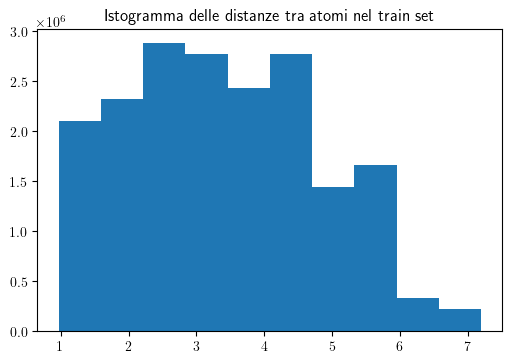

In [17]:
# istogramma delle distanze tra atomi
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.hist(atomic_distances_train, bins=10)
plt.title("Istogramma delle distanze tra atomi nel train set")
plt.show()